In [ ]:
import pandas as pd 
import datetime
import os 
os.environ['TOKENIZERS_PARALLELISM'] = 'false'

science_articles_df = pd.read_json('../data/science_articles.json')

In [5]:
science_articles_df.iloc[0]

url                https://www.nytimes.com/2025/04/13/science/a-c...
firstPublished                              2025-04-13T09:00:47.000Z
tone                                                         FEATURE
typeOfMaterials                                               [News]
headline                          A Cautionary Tale of 408 Tentacles
bylines                                              By Emily Anthes
summary            One pet octopus suddenly became more than four...
timesTags          [your-feed-science, Pets, Social Media, Octopu...
bodyText           Pet Theory\n\nA Cautionary Tale of 408 Tentacl...
Name: 0, dtype: object

<Axes: xlabel='firstPublished'>

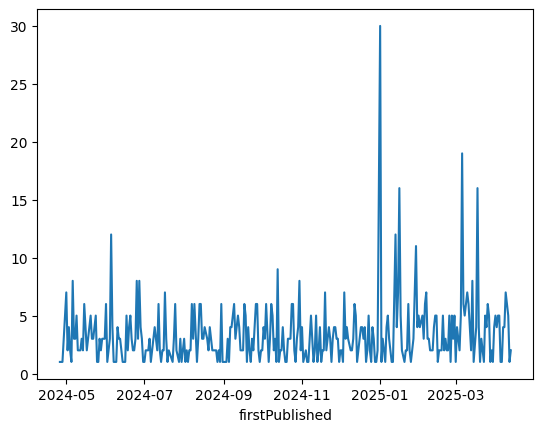

In [23]:
science_articles_df['firstPublished'] = pd.to_datetime(science_articles_df['firstPublished'])

science_articles_df['firstPublished'].dt.date.value_counts().sort_index().plot()

In [54]:
(science_articles_df
 .loc[lambda df: df['firstPublished'].dt.date > datetime.date(2024, 12, 30)]
 .loc[lambda df: df['firstPublished'].dt.date < datetime.date(2025, 1, 2)]
 .head(10)
)

,url,firstPublished,tone,typeOfMaterials,headline,bylines,summary,timesTags,bodyText
382,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:12:43.977000+00:00,NEWS,[Live Blog Post],Dec. 12-13: The Geminids meteor shower will re...,By Katrina Miller,,[],Active from Dec. 1 to Dec. 21. Peak night: Dec...
383,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:12:34.403000+00:00,NEWS,[Live Blog Post],Nov. 16-17: The Leonids meteor shower will rea...,By Katrina Miller,,[],Active from Nov. 3 to Dec. 2. Peak night: Nov....
384,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:12:24.783000+00:00,NEWS,[Live Blog Post],Oct. 22-23: The Orionids meteor shower will re...,By Katrina Miller,,[],Active from Oct. 2 to Nov. 12. Peak night: Oct...
385,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:12:11.532000+00:00,NEWS,[Live Blog Post],Sept. 22: Autumn is here.,By Michael Roston,,[],The autumnal equinox is one of two points in E...
386,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:12:00.307000+00:00,NEWS,[Live Blog Post],Aug. 12-13: The Perseids meteor shower will re...,By Katrina Miller,,[],Active from July 17 to Aug. 23. Peak night: Au...
387,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:11:47.622000+00:00,NEWS,[Live Blog Post],July 4: The Vera C. Rubin Observatory might ca...,By Katrina Miller,,[],"In Chile, an American-funded telescope is comi..."
388,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:11:30.607000+00:00,NEWS,[Live Blog Post],June 20: Summer solstice.,By Michael Roston,,[],It’s the scientific start to summer in the Nor...
389,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:11:16.688000+00:00,NEWS,[Live Blog Post],May 3-4: The Eta Aquarids meteor shower will r...,By Katrina Miller,,[],Active from April 20 to May 21. Peak night: Ma...
390,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:11:02.856000+00:00,NEWS,[Live Blog Post],April 21-22: The Lyrids meteor shower will rea...,By Katrina Miller,,[],Active from April 15 to April 30. Peak night: ...
391,https://www.nytimes.com/explain/2025/science/a...,2025-01-01 13:10:42.218000+00:00,NEWS,[Live Blog Post],"Spring: The Axiom-4 mission may carry Indian, ...",By Michael Roston,,[],Visits to the International Space Station are ...


In [49]:
idx = 7
science_articles_df['summary'].iloc[idx]

'President Trump’s immigration crackdown ensnared Kseniia Petrova, a scientist who fled Russia after protesting its invasion of Ukraine. She fears arrest if she is deported there.'

In [50]:
print(science_articles_df['bodyText'].iloc[idx])

A barracks-style detention center in Louisiana is jammed with around 90 immigrant women, mostly undocumented workers from central and South America, sharing five toilets and following orders shouted by guards.

There is also, among them, a Russian scientist.

She is 30 years old, shy and prone to nervous laughter. She cannot work, because her laptop was confiscated. She plays chess with other women when the guards allow it. Otherwise, she passes the time reading books about evolution and cell development.

For nearly eight weeks, Kseniia Petrova has been captive to the hard-line immigration policies of the Trump administration. A graduate of a renowned Russian physics and technology institute, Ms. Petrova was recruited to work at a laboratory at Harvard Medical School. She was part of a team investigating how cells can rejuvenate themselves, with the goal of fending off the damage of aging.

On Feb. 16, customs officials detained her at Logan International Airport in Boston for failing

In [ ]:
# ideas:
# ----------------------------------------------------------------------------------
# follow-up stories -- articles on the same event
# topic hierarchy

# source analysis
# diff analysis with the original science article

# personalized summary

# Get Sources

In [322]:
SOURCE_EXTRACTION_PROMPT = """
You are a helpful news assistant. Here is a news article:

<news_article>
{news_article}
</news_article>

Please summarize each informational source providing information in the article. 
Include unnamed or passively expressed sources (e.g. "witnesses", "price signals") if there is information attributable to them.
Include any facts that might have come from the source.
Make sure each source you return refer to just one source. For example: if "John and Jane" both contribute the same information, generate two separate summaries, one for "John" and one for "Jane". 
Generate only ONE summary per source.

For each source, provide the following information:
    (1) Name: just the name of the source.
    (2) Biography: A brief biography of the source mentioned in the article.
    (3) Information: Restate the facts provided by the source. Be as SPECIFIC and be as VERBOSE as possible. 
        Contextualize ALL the information the source describes. State the full names of all people, places, events and ideas mentioned and
        everything the source says with AS MUCH BACKGROUND INFORMATION from the article so I can fully understand the information
        the source is giving. I will look at each source independently without looking at any others, so help me understand the context.

Here are some examples:
<examples>
example 1:
{{ "Name": "Supermarkets around the country",
   "Biography": "Retail stores that sell food and other household items",
   "Information": "Supermarkets around the country alerted shoppers that prices are likely to continue going up due to the avian flu outbreak, with eggs now average $2.88 per dozen, up 52% since the first confirmed case of avian influenza in February."
}}

example 2:
{{
  "Name": "The article's author (unnamed)",
  "Biography": "The author of the article",
  "Information": "The author stated that Wing, which is collaborating with FedEx and Walgreens on drone delivery, was the first to receive a limited Part 135 certificate. Wing is launching operations in Virginia this month, and the Standard certification allows UPS to send an unlimited number of drones to the skies, for their cargo load to exceed 55 pounds and for them to fly at night."
}}

example 3:
{{
   "Name": "Delta's customers",
   "Biography": "People who travel with Delta Air Lines",
   "Information": "Delta's customers suggested that they preferred more space on flights amid the COVID-19 pandemic, and they continue to tell Delta that more space provides more peace of mind."
}}

example 4:
{{
   "Name": "European Union countries",
   "Biography": "Countries that are part of the European Union",
   "Information": "European Union countries are working on adopting copyright rules that allow news companies and publishers to negotiate payments with large tech companies like Facebook, Microsoft and Google that use their content on their platforms."
}}
</examples>

Output the summary in a list of python dictionaries as in the examples. Don't say anything else.
"""

ARTICLE_QUESTIONS_PROMPT = """Here is a news article about a scientific paper:

<article>
{article}
</article>

Does the article reference a specific scientific paper? 
If so, can you copy as much information as you can about that paper that is mentioned in the article, so I can search for it?
Please respond in a JSON with the following fields: `contains_paper` and `information`
"""

In [55]:
mkdir openai_batched_data

In [66]:
article_text = science_articles_df['headline'].str.strip() + '\n\n' + science_articles_df['bodyText'].str.strip()
article_text = science_articles_df['bodyText'].str.strip()

In [67]:
article_reference_prompts = article_text.apply(lambda x: ARTICLE_QUESTIONS_PROMPT.format(article=x))

In [68]:
source_extraction_prompts = article_text.apply(lambda x: SOURCE_EXTRACTION_PROMPT.format(news_article=x))

In [70]:
print(source_extraction_prompts[1])


You are a helpful news assistant. Here is a news article:

<news_article>
During his Senate confirmation hearings to be health secretary, Robert F. Kennedy Jr. presented himself as a supporter of vaccines. But in office, he and the agencies he leads have taken far-reaching, sometimes subtle steps to undermine confidence in vaccine efficacy and safety.

The National Institutes of Health halted funding for researchers who study vaccine hesitancy and hoped to find ways to overcome it. It also canceled programs intended to discover new vaccines to prevent future pandemics.

The Centers for Disease Control and Prevention shelved an advertising campaign for the flu shot. Mr. Kennedy has said inaccurately that the scientists who advise the C.D.C. on vaccines have “severe, severe conflicts of interest” in promoting the products and cannot be trusted.

The Health and Human Services Department  cut billions of dollars to state health agencies, including funds needed to modernize state programs 

In [104]:
from tqdm.auto import tqdm
import tiktoken
enc = tiktoken.get_encoding("o200k_base")

all_batched_prompts = []

for prompt_id, prompt in tqdm(enumerate(source_extraction_prompts)):
    all_batched_prompts.append({
        "custom_id": f"source-extraction__{prompt_id}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4.1", 
            "messages": [{"role": "user", "content": prompt}],
        }
    })

for prompt_id, prompt in tqdm(enumerate(article_reference_prompts)):
    all_batched_prompts.append({
        "custom_id": f"article-question__{prompt_id}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4.1", 
            "messages": [{"role": "user", "content": prompt}],
            "max_tokens": 200 # len(enc.encode(prompt))
        }
    })

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [105]:
# pd.DataFrame(all_batched_prompts)['body'].str.get('max_tokens').sum()
# 3_533_048 tokens total

In [396]:
import os 
os.environ['OPENAI_API_KEY'] = open('/Users/spangher/.openai-bloomberg-project-key.txt').read().strip()
from openai import OpenAI
client = OpenAI()

def prompt_openai(prompt, model='gpt-4o-mini'):
    completion = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return completion.choices[0].message.content

def prompt_openai_with_files(prompt, file_id):
    completion = client.chat.completions.create(
        model="gpt-4.1",
            messages=[
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "file",
                            "file": {
                                "file_id": file_id,
                            }
                        },
                        {
                            "type": "text",
                            "text": prompt,
                        },
                    ]
                }
            ]
        )
    return completion.choices[0].message.content

In [107]:
import jsonlines
with jsonlines.open('openai_batched_data/batch_input.jsonl', 'w') as f:
    f.write_all(all_batched_prompts)

batch_input_file = client.files.create(
    file=open("openai_batched_data/batch_input.jsonl", "rb"),
    purpose="batch"
)

print(batch_input_file)

FileObject(id='file-1c7tkHfDU5t2yuwaBT434S', bytes=17931590, created_at=1745545997, filename='batch_input.jsonl', object='file', purpose='batch', status='processed', expires_at=None, status_details=None)


In [108]:
batch_input_file_id = batch_input_file.id
client.batches.create(
    input_file_id=batch_input_file_id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={
        "description": "nightly eval job"
    }
)

Batch(id='batch_680aeb1fb7408190a209e745c10045f0', completion_window='24h', created_at=1745546015, endpoint='/v1/chat/completions', input_file_id='file-1c7tkHfDU5t2yuwaBT434S', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1745632415, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'nightly eval job'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [147]:
client.batches.retrieve("batch_680aeb1fb7408190a209e745c10045f0")

Batch(id='batch_680aeb1fb7408190a209e745c10045f0', completion_window='24h', created_at=1745546015, endpoint='/v1/chat/completions', input_file_id='file-1c7tkHfDU5t2yuwaBT434S', object='batch', status='completed', cancelled_at=None, cancelling_at=None, completed_at=1745547753, error_file_id=None, errors=None, expired_at=None, expires_at=1745632415, failed_at=None, finalizing_at=1745547418, in_progress_at=1745546019, metadata={'description': 'nightly eval job'}, output_file_id='file-9BvSVe6yqmwk4TsRJrEN3c', request_counts=BatchRequestCounts(completed=2200, failed=0, total=2200))

In [149]:
file_response = client.files.content("file-9BvSVe6yqmwk4TsRJrEN3c")
with open('openai_batched_data/source_articles_and_article_questions.jsonl', 'w') as f:
    f.write(file_response.text)

In [151]:
response_df = pd.read_json('openai_batched_data/source_articles_and_article_questions.jsonl', lines=True)

## Get Science articles to search for 

In [225]:
import json

In [314]:
def robust_json(j):
    m = re.search(r'\{[\s\S]*?\}', j)
    if m:
        try:
            return json.loads(m[0])
        except:
            return None

def robust_json_list(j):
    m = re.search(r'\[*?\]', j)
    if m:
        try:
            return json.loads(m[0])
        except:
            return None            

article_references_scientific_article = response_df.loc[lambda df: df['custom_id'].str.contains('article-question')]
article_references_scientific_article['parsed_responses'] = (
    article_references_scientific_article['response']
     .str.get('body')
     .str.get('choices')
     .str.get(0)
     .str.get('message')
     .str.get('content')
     # 
     .str.replace('```json', '').str.replace('```','').str.strip()
     .apply(robust_json)
)

In [316]:
article_references_scientific_article.head(2)

,id,custom_id,response,error,parsed_responses
1100,batch_req_680af13e86448190afa61629f7a7f24b,article-question__0,"{'status_code': 200, 'request_id': 'b5b6d5c118...",NaN,"{'contains_paper': False, 'information': ''}"
1101,batch_req_680af13eae5c81908f8aa08288556f53,article-question__1,"{'status_code': 200, 'request_id': '52fc2deee5...",NaN,"{'contains_paper': False, 'information': ''}"


In [317]:
article_references_scientific_article = (
    article_references_scientific_article
         .pipe(lambda df: pd.concat([
             df.drop(columns=['parsed_responses', 'response', 'error']), 
             df['parsed_responses'].dropna().pipe(lambda s: pd.DataFrame(s.tolist(), index=s.index))
         ], axis=1))
         # .loc[lambda s: s.str.get('contains_paper') == True]
         # .str.get('information').iloc[0]
    .assign(custom_id=lambda df: df['custom_id'].str.split('__').str.get(1).astype(int))
)

In [ ]:
def get_day_of_week(date_string, date_format):
  date_object = datetime.strptime(date_string, date_format).date()
  return date_object.strftime("%A")

In [ ]:
.strftime("%A")

In [351]:
row['firstPublished'].date().strftime("%A")

'Tuesday'

In [356]:
MORE_SPECIFIC_ARTICLE_QUESTIONS_PROMPT = """Here is a news article about a scientific paper:

<article>
{article}
</article>

Please identify the specific identifying information of the scientific paper discussed.
Ideally a title, but anything else (authors, institution, publishing date, topic). 

If you find temporal information indicating the publishing date of the scientific article,
please try to derive an actual date, bearing in mind that the news article was published on:
<date_published>
{pub_date}
</date_published>

Don't use quotes. Format as a search query. If you cannot identify anything, say None.

Your response:
"""

In [ ]:
titles = []
articles_w_ref = science_articles_df.loc[article_references_scientific_article.loc[lambda df: df['contains_paper'] == True]['custom_id']]

for idx, row in tqdm(articles_w_ref.head(50).iterrows(), total=len(articles_w_ref)):
    article_text = row['bodyText']
    pub_date = row['firstPublished'].date()
    d_str = f"{pub_date.strftime('%A')}, {str(pub_date)}"
    r = prompt_openai(MORE_SPECIFIC_ARTICLE_QUESTIONS_PROMPT.format(article=article_text, pub_date=d_str))
    titles.append({
        'id': idx,
        'response': r
    })

In [398]:
linked_title_df = pd.DataFrame(titles)
found_files = [
    {'id': 18, 'file': '../data/found-science-articles/water-abundance-moon.pdf'},
    {'id': 21, 'file': '../data/found-science-articles/medieval-manuscripts.pdf'},
    {'id': 34, 'file': '../data/found-science-articles/warty-birch-caterpillars.pdf'},
    {'id': 38, 'file': '../data/found-science-articles/compositionality-in-bonobos.pdf'},
    {'id': 39, 'file': '../data/found-science-articles/ground-sloths-extinct-species.pdf'},
    {'id': 43, 'file': '../data/found-science-articles/shingles-vaccine.pdf'},
    {'id': 51, 'file': '../data/found-science-articles/stentor-colonies.pdf'},
    {'id': 55, 'file': '../data/found-science-articles/chen-et-al-daily-heart-rate-per-step-(dhrps)-a-wearables-metric-associated-with-cardiovascular-disease-in-a-cross.pdf'},
    {'id': 71, 'file': '../data/found-science-articles/foie-gras-without-force-feeding.pdf'},    
    {'id': 79, 'file': '../data/found-science-articles/funnel-web-spiders.pdf'},    
]

In [399]:
uploaded_file_ids = []
for f in tqdm(found_files):
    file = client.files.create(
        file=open(f['file'], "rb"),
        purpose="user_data"
    )
    uploaded_file_ids.append({
        'id': f['id'],
        'openai_id': file.id
    })

  0%|          | 0/10 [00:00<?, ?it/s]

In [402]:
found_files_df = (
    linked_title_df
        .merge(pd.DataFrame(found_files))
        .merge(pd.DataFrame(uploaded_file_ids))
)

In [404]:
found_files_df.to_csv('../data/file-cache.csv')

In [429]:
science_df_with_files = science_articles_df.merge(found_files_df, left_index=True, right_on='id')

### Help the reader go deeper into each scientific article

In [453]:
import pytesseract
from PIL import Image
from pdf2image import convert_from_path
from pytesseract import image_to_string
import glob

data_dir = '../data/found-science-articles/'
file_names = list(filter(lambda x: '.pdf' in x, os.listdir(data_dir)))

for file_name in tqdm(file_names):
    print(f'running {file_name}')
    input_article = f"{data_dir}/{file_name}"
    output_article = f'{data_dir}/{file_name.replace(".pdf", ".txt")}'
    if os.path.exists(output_article):
        continue
        
    try:
        images = convert_from_path(input_article)
        all_text = []
        for img in tqdm(images):
            text = image_to_string(img)
            all_text.append(text)
    
        full_text = '\n'.join(all_text)
        with open(output_article, 'w') as f:
            f.write(full_text)
    except Exception as e:
        print(f"Failed on: {str(e)}")

  0%|          | 0/10 [00:00<?, ?it/s]

running shingles-vaccine.pdf
running ground-sloths-extinct-species.pdf
running foie-gras-without-force-feeding.pdf
running medieval-manuscripts.pdf
running warty-birch-caterpillars.pdf
running stentor-colonies.pdf
running water-abundance-moon.pdf
running chen-et-al-daily-heart-rate-per-step-(dhrps)-a-wearables-metric-associated-with-cardiovascular-disease-in-a-cross.pdf
running funnel-web-spiders.pdf
running compositionality-in-bonobos.pdf


In [433]:
science_df_with_files = (
    science_df_with_files
        .assign(pdf_file=lambda df: df['file'])
        .assign(txt_file=lambda df: df['pdf_file'].str.replace('.pdf', '.txt'))
)

In [436]:
science_df_with_files.head(2)

,url,firstPublished,tone,typeOfMaterials,headline,bylines,summary,timesTags,bodyText,id,response,file,openai_id,pdf_file,txt_file
0,https://www.nytimes.com/2025/04/09/science/moo...,2025-04-09 15:00:07.673000+00:00,NEWS,[News],Chinese Lunar Rocks Suggest a Thirsty Far Side...,By Katrina Miller,Using samples gathered from the Chang’e-6 miss...,"[Moon, China, Space and Astronomy, Research, W...",The far side of the moon — the part that alway...,18,Title: Water content differences in the lunar ...,../data/found-science-articles/water-abundance...,file-Nh7LQyo6jNjmGs4DGdstrA,../data/found-science-articles/water-abundance...,../data/found-science-articles/water-abundance...
1,https://www.nytimes.com/2025/04/08/science/med...,2025-04-08 23:01:06.364000+00:00,FEATURE,[News],The Skin on Mysterious Medieval Books Conceale...,By Jack Tamisiea,The material on the covers of books from a Fre...,"[Manuscripts, Fur, Seals (Animals) and Sealing...",Medieval scribes filled volumes called bestiar...,21,"Sealskin bookbindings, medieval manuscripts, M...",../data/found-science-articles/medieval-manusc...,file-Td96rE5G2V47Xu82uRLohE,../data/found-science-articles/medieval-manusc...,../data/found-science-articles/medieval-manusc...


In [599]:
science_df_with_files.to_json('../data/science_articles-with-parsed-files.json.gz', lines=True, orient='records')

# Get Sources

In [584]:
import re
NARRATIVE_KEYWORD_PROMPT = """
You will receive a news article and a set of sources to examine in that article.

For each source in the list, provide the following information, once per source:
    (1) Name: Exactly copy the name of the source.
    (2) Narrative Function: Give a generic keyword label to categorize the narrative role the source playes in the article. 
    Infer why the author used the source, and a generalizable statement about the role they play in the article.
    Don't just summarize their identity. Return in the format: "LABEL": DESCRIPTION.

Here are example outputs. Again, your main task here is to identify a generalizable label that can characterize the narrative role of each source and why the author used them. 

<examples>
Example 1:

{{
    "Name": "Match Group",
    "Narrative Function": "\"Counterpoint\": This source is used to compare to the main actor in the news article and provide grounding."
}}

Example 2:

{{
    "Name": "Dubai Airshow",
    "Narrative Function": "\"More Context\": This source is used to further expand the context offered and offer a visual setting."
}}

Example 3:
{{

    "Name": "Ann Gough",
    "Narrative Function": "\"Victim\": This source provides the voice of a user for the product, giving us a personal view of the harm caused by the event.
}}
</examples>

[Instructions]

Now it's your turn. Here is a news article:

<news_article>
{news_article}
</news_article>

Please examine the narrative role of each of the following sources: 

<sources>
[{target_sources}]
</sources>

For each source, answer the questions above. Output the summary in a list of python dictionaries as in the examples. Don't say anything else.
"""


CENTRALITY_AND_PERSPECTIVE_PROMPT = """
You will receive a news article and a set of sources to examine in that article.
    
    For each source, provide the following information:
        (1) Name: who the source is.
        (2) Spoken_to: Did the journalist actually speak to the source, or did they just reference the source from other materials? Answer with 'Yes' or 'No'.
        (3) Information_Channel: If the journalist did NOT speak to the source, please describe how they accessed information from the source.
        (4) Perspective: What is their perspective on the main events of the article? Choose as many labels as fit from: ["Authoritative", "Informative", "Supportive", "Skeptical", "Against", "Neutral"]. Do not invent any labels.
        (5) Centrality: How central is this source to the main events of the article? Choose from "High", "Medium", "Low".
        (6) Is_Error: Did we annotate this source in error? This can happen for many reasons, including if a sentence from the webpage was included in the story unintentionally. Answer with "Yes" or "No".

Here is a news article:

<news_article>
{news_article}
</news_article>

Please examine the role of each of the following sources: 

<sources>
[{target_sources}]
</sources>

For each source, answer the questions above. Output the summary in a list of python dictionaries as in the examples. Don't say anything else.
"""

In [606]:
pd.read_json('../app/app_data/science_article_sample.jsonl', lines=True)

,id,headline,bylines,bodyText
0,18,Chinese Lunar Rocks Suggest a Thirsty Far Side...,By Katrina Miller,The far side of the moon — the part that alway...
1,21,The Skin on Mysterious Medieval Books Conceale...,By Jack Tamisiea,Medieval scribes filled volumes called bestiar...
2,34,The Very Territorial Caterpillar,By Becky Ferreira,When territorial animals are confronted by int...
3,38,"In the Calls of Bonobos, Scientists Hear Hints...",By Carl Zimmer,After listening to hundreds of hours of ape ca...
4,39,Scientists Reveal the Hairy Truth About Giant ...,By Jeanne Timmons,Ground sloths emerged in South America tens of...
5,43,Shingles Vaccine Can Decrease Risk of Dementia...,By Pam Belluck,Getting vaccinated against shingles can reduce...
6,51,Eating ‘Family Style’ May Have Set the Stage f...,By Jack Tamisiea,"For a creature made up of only a single cell, ..."
7,55,Using a ‘Tiny Bit of Math’ May Improve Your He...,By Matt Richtel,Many people use a smartwatch to monitor their ...
8,71,Foie Gras That Skips the Force-Feeding Is Deve...,By Ari Daniel,"Thomas Vilgis, a food physicist at the Max Pla..."
9,79,"Everyone in the City Needs Soundproofing, Even...",By Joshua Rapp Learn,There’s nothing worse than a noisy neighbor wh...


In [618]:
doc_data = json.load(open('../app/app_data/doc_source_data.json'))

In [636]:
doc_data['38']

[{'Name': 'Federica Amici',
  'Biography': 'Primatologist at the University of Leipzig in Germany.',
  'Information': 'Federica Amici stated that the study on ape calls being able to form compositional structures helps to place the roots of language much further back in evolutionary history, to millions of years before the emergence of Homo sapiens. She believes that differences between humans and other primates, especially in terms of communication, are much less clear-cut than has long been assumed, suggesting a greater continuity between human and non-human primate communication capabilities.',
  'Narrative Function': '"Expert Endorsement": This source is used to provide expert validation and supportive interpretation of the study\'s significance, adding weight to the finding that the roots of language are older and differences between humans and primates are less distinct.',
  'Spoken_to': 'Yes',
  'Information_Channel': '',
  'Perspective': ['Authoritative', 'Informative', 'Suppor

In [637]:
science_articles_df.loc[38]

url                https://www.nytimes.com/2025/04/03/science/com...
firstPublished                             2025-04-03 18:00:07+00:00
tone                                                            NEWS
typeOfMaterials                                               [News]
headline           In the Calls of Bonobos, Scientists Hear Hints...
bylines                                               By Carl Zimmer
summary            Hundreds of hours of recordings suggest that t...
timesTags          [Monkeys and Apes, Language and Languages, Ani...
bodyText           After listening to hundreds of hours of ape ca...
Name: 38, dtype: object

In [631]:
science_articles_df.loc[lambda df: df['bodyText'].str.contains('Yusen Zhai')]

,url,firstPublished,tone,typeOfMaterials,headline,bylines,summary,timesTags,bodyText
1000,https://www.nytimes.com/2024/05/30/health/ptsd...,2024-05-30 15:00:07+00:00,NEWS,[News],PTSD Has Surged Among College Students,By Ellen Barry,The prevalence of post-traumatic stress disord...,"[Research, Post-Traumatic Stress Disorder, Men...",Post-traumatic stress disorder diagnoses among...


In [633]:
(science_articles_df[['headline', 'bylines', 'bodyText']]
 .reset_index().rename(columns={'index': 'id'})
 .loc[lambda df: df['bodyText'].str.contains('Yusen Zhai')]
 # .to_json('../app/app_data/science_articles_full.jsonl', lines=True, orient='records')
)

,id,headline,bylines,bodyText
1000,1000,PTSD Has Surged Among College Students,By Ellen Barry,Post-traumatic stress disorder diagnoses among...


In [ ]:
def simple_json_parse(j):
    try:
        return json.loads(j)
    except:
        return None

import warnings
warnings.simplefilter(action='ignore')

In [276]:
article_sources = response_df.loc[lambda df: df['custom_id'].str.contains('source-extraction')]
article_sources['parsed_responses'] = (
    article_sources['response']
     .str.get('body')
     .str.get('choices')
     .str.get(0)
     .str.get('message')
     .str.get('content')
     # 
     .str.replace('```json', '').str.replace('```','').str.strip()
     .apply(simple_json_parse)
)

In [277]:
article_sources['sources'] = (
    article_sources['parsed_responses']
     .apply(lambda x: list(map(lambda y: y['Name'], x)) if x is not None else [])
)

In [594]:
article_sources.to_json('../data/output_data/parsed_source_info.jsonl', lines=True, orient='records')

In [587]:
from tqdm.auto import tqdm
import tiktoken
enc = tiktoken.get_encoding("o200k_base")

all_batched_prompts = []
for idx, row in (article_sources
                 .assign(id=lambda df: df['custom_id'].str.split('__').str.get(1).astype(int))[['id', 'sources']]
                 .merge(science_articles_df, right_index=True, left_on='id')
                 .iterrows()
):
    target_sources = ', '.join(row['sources'])
    if False:
        prompt = NARRATIVE_KEYWORD_PROMPT.format(news_article=row['bodyText'], target_sources = target_sources)
        all_batched_prompts.append({
            "custom_id": f"narrative-understanding__{idx}",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4.1", 
                "messages": [{"role": "user", "content": prompt}],
            }
        })

    prompt = CENTRALITY_AND_PERSPECTIVE_PROMPT.format(news_article=row['bodyText'], target_sources = target_sources)
    all_batched_prompts.append({
        "custom_id": f"centrality-perspective__{idx}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4.1", 
            "messages": [{"role": "user", "content": prompt}],
            # "max_tokens": 200 # len(enc.encode(prompt))
        }
    })

In [588]:
import jsonlines
with jsonlines.open('openai_batched_data/third_round_batch_input.jsonl', 'w') as f:
    f.write_all(all_batched_prompts)

batch_input_file = client.files.create(
    file=open("openai_batched_data/third_round_batch_input.jsonl", "rb"),
    purpose="batch"
)

print(batch_input_file)

FileObject(id='file-NunpZSqCGZSWJMQuEp73xK', bytes=8831753, created_at=1745636593, filename='third_round_batch_input.jsonl', object='file', purpose='batch', status='processed', expires_at=None, status_details=None)


In [589]:
batch_input_file_id = batch_input_file.id
client.batches.create(
    input_file_id=batch_input_file_id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={
        "description": "nightly eval job"
    }
)

Batch(id='batch_680c4cf7398081909a1b5727531f1391', completion_window='24h', created_at=1745636599, endpoint='/v1/chat/completions', input_file_id='file-NunpZSqCGZSWJMQuEp73xK', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1745722999, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'nightly eval job'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))